# 과제#2. 직원 이직 예측

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 이직할 것으로 보이는 직원들에 대해 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 어떤 직원이 이직할지 예측해 봅시다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2
5,1,22,Travel_Frequently,Research & Development,4.0,1,Technical Degree,593,3,Male,...,No,16,3,0,4,3,3,2,2,2
6,0,24,Travel_Rarely,Research & Development,21.0,2,Technical Degree,1551,3,Male,...,No,14,2,3,2,3,3,1,1,0
7,0,34,Travel_Rarely,Research & Development,8.0,3,Medical,2068,2,Male,...,No,12,1,0,6,3,4,4,3,2
8,0,30,Travel_Rarely,Research & Development,20.0,3,Other,1084,3,Male,...,No,15,3,1,7,1,2,6,2,2
9,0,26,Travel_Rarely,Research & Development,6.0,3,Life Sciences,686,3,Female,...,Yes,13,3,1,3,2,3,3,2,2


In [62]:
data['Department'].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [61]:
data['EducationField'].unique()

array(['Medical', 'Life Sciences', 'Marketing', 'Technical Degree',
       'Other', 'Human Resources'], dtype=object)

|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EmployeeNumber	|	사번	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	OverTime	|	야근여부	|	범주	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


----

## 1.데이터 탐색

## 2.데이터 전처리 

In [3]:
target = 'Attrition'

### 2.1 데이터 정리

* feature와 , target으로 분할

In [4]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 불필요한 feature 제거
    * 제거해야 할 feature를 선정하고 제거하시오. 제거 이유를 주석으로 기술합니다.

In [5]:
# 현부서, 전공, 사번, 성별을 제거했습니다.
# 현부서를 제거한 이유 : 회사에서 이직을 하는 이유에 따른 보완 사항을 구하는 것임으로 부서별로 보는 것은 적절하지 않다고 생각합니다.
# 전공을 제거한 이유 : 전공과 현부서가 같을 필요는 없기 때문에 제거했습니다.
# 사번 : 모든 임직원이 다 다른 값을 가지기 때문에 제거했습니다.
# 성별 : 다변량 분석을 진행했을 때 Gender는 이직률과 관계가 없는 것으로 나왔습니다.

del_col = ['Department', 'EducationField', 'EmployeeNumber', 'Gender']

x.drop(del_col, axis=1, inplace=True)

x.head()

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,33,Travel_Rarely,7.0,3,3,3,Research Director,3,Married,11691,...,No,11,4,0,14,3,4,13,9,7
1,35,Travel_Frequently,18.0,2,3,3,Manufacturing Director,4,Single,9362,...,No,11,3,0,10,2,3,2,2,2
2,42,Travel_Rarely,6.0,3,3,3,Research Director,1,Married,13348,...,No,13,2,1,18,3,4,13,7,7
3,46,Travel_Rarely,2.0,3,3,3,Manager,1,Married,17048,...,No,23,1,0,28,2,3,26,15,9
4,39,Travel_Frequently,NaN,3,3,3,Sales Executive,4,Divorced,4127,...,No,18,4,1,7,6,3,2,1,2


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1250 non-null   int64  
 1   BusinessTravel            1250 non-null   object 
 2   DistanceFromHome          1196 non-null   float64
 3   Education                 1250 non-null   int64  
 4   EnvironmentSatisfaction   1250 non-null   int64  
 5   JobInvolvement            1250 non-null   int64  
 6   JobRole                   1250 non-null   object 
 7   JobSatisfaction           1250 non-null   int64  
 8   MaritalStatus             1250 non-null   object 
 9   MonthlyIncome             1250 non-null   int64  
 10  NumCompaniesWorked        1229 non-null   float64
 11  OverTime                  1250 non-null   object 
 12  PercentSalaryHike         1250 non-null   int64  
 13  RelationshipSatisfaction  1250 non-null   int64  
 14  StockOpt

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [7]:
x.isna().sum()

Age                          0
BusinessTravel               0
DistanceFromHome            54
Education                    0
EnvironmentSatisfaction      0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

* SimpleImputer : 특정 값으로 체울 시

* 가변수화 진행 후 KNNImputer를 사용하겠습니다.

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [8]:
# object형이거나 범주형 데이터이지만 0-4 정도로 표시되어있는 값을 가변수화 진행
domies_col = ['BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
              'RelationshipSatisfaction', 'WorkLifeBalance']

x = pd.get_dummies(x, columns=domies_col, drop_first=True)

x.head()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobInvolvement_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,33,7.0,3,11691,0.0,11,0,14,3,13,...,0,0,1,0,0,0,1,0,0,1
1,35,18.0,2,9362,2.0,11,0,10,2,2,...,0,0,0,1,0,1,0,0,1,0
2,42,6.0,3,13348,9.0,13,1,18,3,13,...,0,0,0,0,1,0,0,0,0,1
3,46,2.0,3,17048,8.0,23,0,28,2,26,...,0,0,0,0,0,0,0,0,1,0
4,39,NaN,3,4127,2.0,18,1,7,6,2,...,0,0,0,1,0,0,1,0,1,0


- KNNUmputer 진행

In [9]:
from sklearn.impute import KNNImputer

impute = KNNImputer(n_neighbors=5)
imputed = impute.fit_transform(x)

In [10]:
x = pd.DataFrame(imputed, columns=x.columns)

x.head()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobInvolvement_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,33.0,7.0,3.0,11691.0,0.0,11.0,0.0,14.0,3.0,13.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,35.0,18.0,2.0,9362.0,2.0,11.0,0.0,10.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,6.0,3.0,13348.0,9.0,13.0,1.0,18.0,3.0,13.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,46.0,2.0,3.0,17048.0,8.0,23.0,0.0,28.0,2.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,39.0,9.0,3.0,4127.0,2.0,18.0,1.0,7.0,6.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [11]:
x.isna().sum()

Age                                 0
DistanceFromHome                    0
Education                           0
MonthlyIncome                       0
NumCompaniesWorked                  0
PercentSalaryHike                   0
StockOptionLevel                    0
TotalWorkingYears                   0
TrainingTimesLastYear               0
YearsAtCompany                      0
YearsInCurrentRole                  0
YearsWithCurrManager                0
BusinessTravel_Travel_Frequently    0
BusinessTravel_Travel_Rarely        0
JobRole_Human Resources             0
JobRole_Laboratory Technician       0
JobRole_Manager                     0
JobRole_Manufacturing Director      0
JobRole_Research Director           0
JobRole_Research Scientist          0
JobRole_Sales Executive             0
JobRole_Sales Representative        0
MaritalStatus_Married               0
MaritalStatus_Single                0
OverTime_Yes                        0
EnvironmentSatisfaction_2           0
EnvironmentS

### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.
* 추가변수에 대해서 주석으로 설명하시오.

### 2.5 데이터 분할

* test 200건(test_size = 200), random_state = 2022
* val 200건(test_size = 200), random_state = 2022
* train 나머지.

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=200, random_state=2022)

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=200, random_state=2022) 

In [14]:
(x_train.shape, y_train.shape), (x_val.shape, y_val.shape), (x_test.shape, y_test.shape)

(((850, 40), (850,)), ((200, 40), (200,)), ((200, 40), (200,)))

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [15]:
from sklearn.preprocessing import MinMaxScaler

x_col = list(x)

# MinMaxScaler 적용
scaler = MinMaxScaler()
x_tr_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

# DataFrame 변환
x_tr_s = pd.DataFrame(x_tr_s, columns=x_col)
x_val_s = pd.DataFrame(x_val_s, columns=x_col)

In [16]:
x_tr_s.head()

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobInvolvement_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.976190,0.071429,0.50,0.217437,0.555556,0.428571,0.000000,0.325,0.333333,0.150,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.523810,0.035714,0.50,0.068292,0.222222,0.214286,0.333333,0.200,0.500000,0.075,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.404762,0.607143,0.75,0.244775,0.111111,0.214286,0.666667,0.250,0.333333,0.250,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.190476,0.000000,0.25,0.153262,0.111111,0.357143,0.666667,0.150,0.333333,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.380952,0.000000,0.50,0.226515,0.000000,0.642857,0.000000,0.350,0.500000,0.325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
    * 튜닝 과정에 대해서 주석으로 기술합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다. 코드 결과에 대한 분석 의견을 주석으로 기술합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Logistic Regression 모델링

In [18]:
# 모델 생성
m_lr = LogisticRegression(max_iter=10000)

# 모델 훈련
m_lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [19]:
print(list(x_train))
print(m_lr.coef_)
print(m_lr.intercept_)

['Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes', 'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4', 'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4', 'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4', 'RelationshipSatisfaction_2', 'RelationshipSatisfaction_3', 'RelationshipSatisfaction_4', 'WorkLifeBalance_2', 'WorkLifeBalance_3', 'WorkLifeBalance_4']
[[-3.66732036e-02  4.46038030e-02 -5.90996

In [20]:
# 예측
y_pred_lr = m_lr.predict(x_val)
print(classification_report(y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       176
           1       0.60      0.25      0.35        24

    accuracy                           0.89       200
   macro avg       0.75      0.61      0.65       200
weighted avg       0.87      0.89      0.87       200



#### (2) Decision Tree 모델링

In [21]:
# RandomizedSearchCV 진행
m_dt = DecisionTreeClassifier(random_state=2022,)

param = {'max_depth' : range(1, 51)}

m_dt_rand = RandomizedSearchCV(m_dt,
                               param,
                               cv=10,
                               n_iter=10,
                               scoring='accuracy')

m_dt_rand.fit(x_train, y_train)

print(m_dt_rand.best_estimator_)

DecisionTreeClassifier(max_depth=2, random_state=2022)


In [22]:
# RandomizedSearchCV 결과를 DataFrame으로 변환
result_random = pd.DataFrame(m_dt_rand.cv_results_)
result_random = result_random[['param_max_depth', 'mean_test_score']]
result_random.sort_values(by='param_max_depth', inplace=True)
result_random.reset_index(drop=True, inplace=True)

In [23]:
# GridSearchCV 할 범위 지정
idx = result_random[result_random['param_max_depth']==m_dt_rand.best_params_['max_depth']].index[0]

start = 1
end = 21
if idx != 0 :
    start = result_random.loc[idx-1]['param_max_depth']
if idx != 10 :
    end = result_random.loc[idx+1]['param_max_depth']

In [24]:
# GridSEarchCV 진행
m_dt = DecisionTreeClassifier(random_state=2022,)

param = {'max_depth' : range(start, end)}

m_dt_grid = GridSearchCV(m_dt,
                         param,
                         cv=10,
                         scoring='accuracy')

m_dt_grid.fit(x_train, y_train)

print(m_dt_grid.best_estimator_)

DecisionTreeClassifier(max_depth=2, random_state=2022)


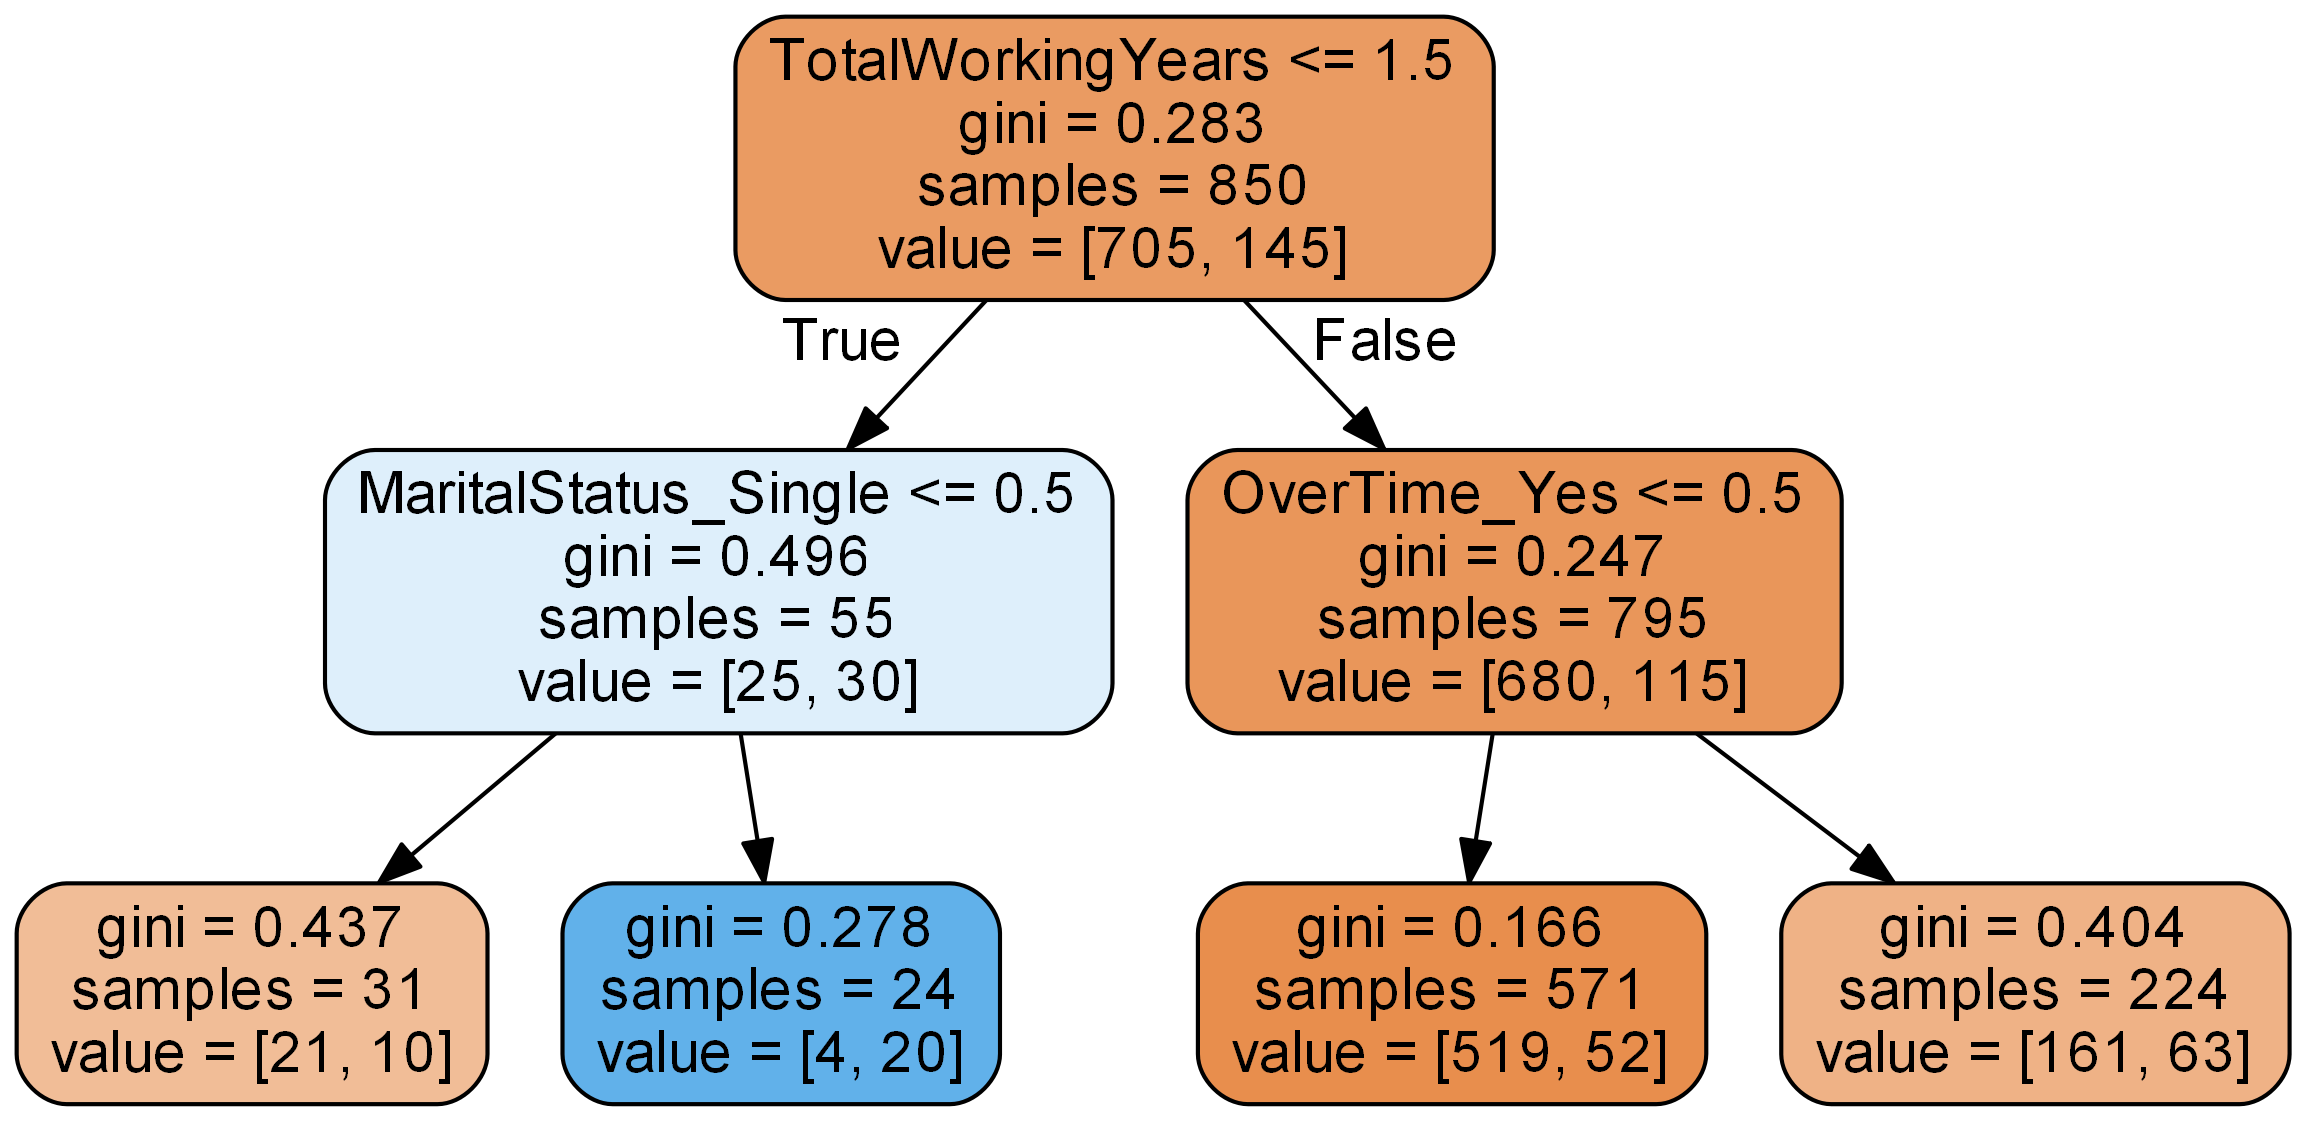

In [25]:
# 시각화
from sklearn.tree import export_graphviz

export_graphviz(m_dt_grid.best_estimator_,
                out_file = 'tree.dot',
                feature_names = x_train.columns,
                rounded = True, precision = 3, filled = True)
!dot -Tpng tree.dot -o tree.png -Gdpi=300

#이미지 파일 로딩하기.
from IPython.display import Image
Image(filename = 'tree.png', width = 800)  # 사이즈 조정.

# 7일 전의 이용량과 2일전의 이용량 변수가 자주 사용되었음을 확인가능

In [26]:
m_dt = m_dt_grid.best_estimator_
m_dt.fit(x_train, y_train)
val_pred_dt = m_dt.predict(x_val)
print(classification_report(y_val, val_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       176
           1       0.29      0.08      0.13        24

    accuracy                           0.86       200
   macro avg       0.59      0.53      0.53       200
weighted avg       0.81      0.86      0.83       200



#### (3) KNN 모델링

In [27]:
# RandomizedSearchCV 진행
m_knn = KNeighborsClassifier()

param = {'n_neighbors' : range(2, 51)}

m_knn_rand = RandomizedSearchCV(m_knn,
                               param,
                               cv=10,
                               n_iter=10,
                               scoring='accuracy')

m_knn_rand.fit(x_tr_s, y_train)

print(m_knn_rand.best_estimator_)

KNeighborsClassifier(n_neighbors=14)


In [28]:
# RandomizedSearchCV 결과를 DataFrame으로 변환
result_random = pd.DataFrame(m_knn_rand.cv_results_)
result_random = result_random[['param_n_neighbors', 'mean_test_score']]
result_random.sort_values(by='param_n_neighbors', inplace=True)
result_random.reset_index(drop=True, inplace=True)

In [29]:
# GridSearchCV 할 범위 지정
idx = result_random[result_random['param_n_neighbors']==m_knn_rand.best_params_['n_neighbors']].index[0]

start = 1
end = 21
if idx != 0 :
    start = result_random.loc[idx-1]['param_n_neighbors']
if idx != 10 :
    end = result_random.loc[idx+1]['param_n_neighbors']

In [30]:
# GridSEarchCV 진행
param = {'n_neighbors' : range(start, end)}

m_knn_grid = GridSearchCV(m_knn,
                         param,
                         cv=10,
                         scoring='accuracy')

m_knn_grid.fit(x_tr_s, y_train)

print(m_knn_grid.best_estimator_)

KNeighborsClassifier(n_neighbors=11)


In [31]:
m_knn = m_knn_grid.best_estimator_
m_knn.fit(x_tr_s, y_train)
val_pred_knn = m_knn.predict(x_val_s)
print(classification_report(y_val, val_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       176
           1       0.00      0.00      0.00        24

    accuracy                           0.88       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.77      0.88      0.82       200



#### (4) SVM 모델링

In [32]:
# GridSEarchCV 진행
m_svm = SVC()

# np.logspace(-3, 4, 8) : [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000]
param = {'C':np.logspace(-3, 4, 8), 'gamma': np.logspace(-3, 4, 8)}

m_svm_grid = GridSearchCV(m_svm,
                          param,
                          cv=10,
                          scoring='accuracy')

m_svm_grid.fit(x_tr_s, y_train)

print(m_svm_grid.best_estimator_)

SVC(C=1000.0, gamma=0.001)


In [33]:
m_svm = m_svm_grid.best_estimator_
m_svm.fit(x_tr_s, y_train)
val_pred_svm = m_svm.predict(x_val_s)
print(classification_report(y_val, val_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       176
           1       0.60      0.25      0.35        24

    accuracy                           0.89       200
   macro avg       0.75      0.61      0.65       200
weighted avg       0.87      0.89      0.87       200



#### (5) Random Forest 모델링

In [34]:
# RandomizedSearchCV 진행
m_rf = RandomForestClassifier(random_state=2022,)

param = {'max_depth' : range(1, 51)}

m_rf_rand = RandomizedSearchCV(m_rf,
                               param,
                               cv=10,
                               n_iter=10,
                               scoring='accuracy')

m_rf_rand.fit(x_train, y_train)

print(m_rf_rand.best_estimator_)

RandomForestClassifier(max_depth=41, random_state=2022)


In [35]:
# RandomizedSearchCV 결과를 DataFrame으로 변환
result_random = pd.DataFrame(m_rf_rand.cv_results_)
result_random = result_random[['param_max_depth', 'mean_test_score']]
result_random.sort_values(by='param_max_depth', inplace=True)
result_random.reset_index(drop=True, inplace=True)

In [36]:
# GridSearchCV 할 범위 지정
idx = result_random[result_random['param_max_depth']==m_rf_rand.best_params_['max_depth']].index[0]

start = 1
end = 21
if idx != 0 :
    start = result_random.loc[idx-1]['param_max_depth']
if idx != 10 :
    end = result_random.loc[idx+1]['param_max_depth']

In [37]:
# GridSEarchCV 진행
param = {'max_depth' : range(start, end)}

m_rf_grid = GridSearchCV(m_rf,
                         param,
                         cv=10,
                         scoring='accuracy')

m_rf_grid.fit(x_train, y_train)

print(m_rf_grid.best_estimator_)

RandomForestClassifier(max_depth=39, random_state=2022)


In [38]:
m_rf = m_dt_grid.best_estimator_
m_rf.fit(x_train, y_train)
val_pred_rf = m_rf.predict(x_val)
print(classification_report(y_val, val_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       176
           1       0.29      0.08      0.13        24

    accuracy                           0.86       200
   macro avg       0.59      0.53      0.53       200
weighted avg       0.81      0.86      0.83       200



#### (6) XGB 모델링

In [39]:
# RandomizedSearchCV 진행
m_xgb = XGBClassifier(use_label_encoder=False, random_state=2022)

param = {'max_depth': range(2,6),
         'n_estimators' : range(20,201,10),
         'learning_rate':[0.01,0.1,0.2, 0.3]}

m_xgb_grid = RandomizedSearchCV(m_xgb, 
                                param, 
                                n_iter = 20, 
                                cv = 10, 
                                scoring = 'accuracy')

m_xgb_grid.fit(x_train, y_train, eval_metric='logloss')

print(m_xgb_grid.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=120, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [40]:
m_xgb = m_xgb_grid.best_estimator_
m_xgb.fit(x_train, y_train, eval_metric='logloss')
val_pred_xgb = m_xgb.predict(x_val)
print(classification_report(y_val, val_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       176
           1       0.54      0.29      0.38        24

    accuracy                           0.89       200
   macro avg       0.72      0.63      0.66       200
weighted avg       0.86      0.89      0.87       200



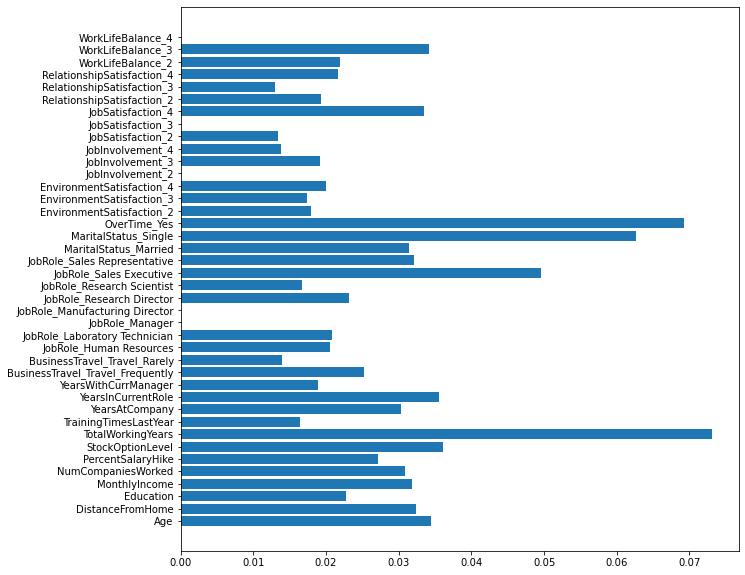

In [67]:
plt.figure(figsize=(10, 10))
plt.barh(y=list(x_train), width=m_xgb.feature_importances_)
plt.show()

## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [41]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.backend import clear_session
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

* 모델1 

In [42]:
x_train.shape, y_train.shape

((850, 40), (850,))

In [51]:
# 초기화
clear_session()

# 레이어 생성
input_layer = Input(shape=(40,))
output_layer = Dense(1, activation='sigmoid')(input_layer)

# 모델 생성
model1 = Model(input_layer, output_layer)

# 모델 컴파일
model1.compile(loss=binary_crossentropy, metrics=['accuracy'], optimizer=Adam())

model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


* 모델2

In [52]:
# 초기화
clear_session()

# 레이어 생성
input_layer = Input(shape=(40))
hiden_layer = Dense(64, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hiden_layer)

# 모델 생성
model2 = Model(input_layer, output_layer)

# 모델 컴파일
model2.compile(loss=binary_crossentropy, metrics=['accuracy'], optimizer=Adam())

model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 64)                2624      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


* 모델3

In [53]:
# 초기화
clear_session()

# 레이어 생성
input_layer = Input(shape=(40,))
hiden_layer = Dense(64, activation='relu')(input_layer)
hiden_layer = Dense(64, activation='relu')(hiden_layer)
output_layer = Dense(1, activation='sigmoid')(hiden_layer)

# 모델 생성
model3 = Model(input_layer, output_layer)

# 모델 컴파일
model3.compile(loss=binary_crossentropy, metrics=['accuracy'], optimizer=Adam())

model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 64)                2624      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,849
Trainable params: 6,849
Non-trainable params: 0
_________________________________________________________________


### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


In [54]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)

In [55]:
model1.fit(x_train, y_train, epochs=100, verbose=1, callbacks=[es], validation_split=0.15)

y_pred1 = model1.predict(x_val)
y_pred_dl1 = np.where(y_pred1 > 0.5, 1 , 0)

print(classification_report(y_val, y_pred_dl1))

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 230.2297 - accuracy: 0.8338 - val_loss: 227.4785 - val_accuracy: 0.8047
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 212.2679 - accuracy: 0.8338 - val_loss: 210.1254 - val_accuracy: 0.8047
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 195.2272 - accuracy: 0.8338 - val_loss: 191.1725 - val_accuracy: 0.8047
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 176.9552 - accuracy: 0.8338 - val_loss: 173.4309 - val_accuracy: 0.8047
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 159.7840 - accuracy: 0.8338 - val_loss: 154.6472 - val_accuracy: 0.8047
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 141.9039 - accuracy: 0.8338 - val_loss: 135.8147 - val_accuracy: 0.8047
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 124.0134 - accuracy: 0.8338 - val_loss: 117.8597 - val_a

23/23 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.8061 - val_loss: 0.3911 - val_accuracy: 0.8438
Epoch 59/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.8158 - val_loss: 0.5531 - val_accuracy: 0.7188
Epoch 60/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.8047 - val_loss: 0.3887 - val_accuracy: 0.8281
Epoch 61/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.8199 - val_loss: 0.3840 - val_accuracy: 0.8516
Epoch 62/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5576 - accuracy: 0.7978 - val_loss: 0.5054 - val_accuracy: 0.8047
Epoch 63/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5552 - accuracy: 0.8213 - val_loss: 0.4815 - val_accuracy: 0.7656
Epoch 64/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7978 - val_loss: 0.5373 - val_accuracy: 0.7109
Epoch 65/100
23/23 

In [56]:
model2.fit(x_train, y_train, epochs=100, verbose=1, callbacks=[es], validation_split=0.15)

y_pred2 = model2.predict(x_val)
y_pred_dl2 = np.where(y_pred2 > 0.5, 1 , 0)

print(classification_report(y_val, y_pred_dl2))

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 573.7864 - accuracy: 0.1662 - val_loss: 101.8789 - val_accuracy: 0.1953
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 32.3688 - accuracy: 0.7507 - val_loss: 40.8086 - val_accuracy: 0.8047
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 31.5344 - accuracy: 0.8338 - val_loss: 18.4780 - val_accuracy: 0.8047
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 7.0880 - accuracy: 0.7659 - val_loss: 2.5038 - val_accuracy: 0.8047
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 1.5106 - accuracy: 0.7756 - val_loss: 1.6281 - val_accuracy: 0.8047
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.8441 - accuracy: 0.7798 - val_loss: 1.1273 - val_accuracy: 0.8047
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9238 - accuracy: 0.7770 - val_loss: 0.7691 - val_accuracy: 0.8047
Epoc

In [57]:
model3.fit(x_train, y_train, epochs=100, verbose=1, callbacks=[es], validation_split=0.15)

y_pred3 = model3.predict(x_val)
y_pred_dl3 = np.where(y_pred3 > 0.5, 1 , 0)

print(classification_report(y_val, y_pred_dl3))

Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 190.9831 - accuracy: 0.5983 - val_loss: 73.3145 - val_accuracy: 0.8047
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 44.3107 - accuracy: 0.8338 - val_loss: 1.5522 - val_accuracy: 0.8047
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 9.0332 - accuracy: 0.7091 - val_loss: 0.7419 - val_accuracy: 0.8047
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 1.4675 - accuracy: 0.7756 - val_loss: 1.6585 - val_accuracy: 0.8047
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 2.5408 - accuracy: 0.7659 - val_loss: 1.8717 - val_accuracy: 0.8047
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 2.8659 - accuracy: 0.7659 - val_loss: 6.0968 - val_accuracy: 0.8047
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 2.5662 - accuracy: 0.7812 - val_loss: 0.4903 - val_accuracy: 0.8125
Epoch 8/

## 5.성능 비교
* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
    * 평가지표 선정 이유도 주석으로 기술하시오.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

### 5.1 평가지표 결정

* 어떤 지표로 성능을 비교할지 결정합니다.
* 결정 이유를 기술합니다.

* recall : 실제 값 중에서 맞춘 비율
* precision : 예상한 값 중에서 맞춘 비율

1. accuracy가 높은 것을 우선으로 평가한다.
2. 1의 precision가 높은 것을 우선으로 평가한다.
    * 이유 : 예상한 사람들 중에서 실제로 이직하는 사람을 찾아야하기 때문입니다.

### 5.2 성능 비교

In [58]:
print('='*54)
print('Logistic Regration')
print('-'*54)
print(classification_report(y_val, y_pred_lr))
print('='*54)
print('Decision Tree')
print('-'*54)
print(classification_report(y_val, val_pred_dt))
print('='*54)
print('KNN')
print('-'*54)
print(classification_report(y_val, val_pred_knn))
print('='*54)
print('SVM')
print('-'*54)
print(classification_report(y_val, val_pred_svm))
print('='*54)
print('Random Forest')
print('-'*54)
print(classification_report(y_val, val_pred_rf))
print('='*54)
print('XGBoost')
print('-'*54)
print(classification_report(y_val, val_pred_xgb))
print('='*54)
print('Deep Learning 1')
print('-'*54)
print(classification_report(y_val, y_pred_dl1))
print('='*54)
print('Deep Learning 2')
print('-'*54)
print(classification_report(y_val, y_pred_dl2))
print('='*54)
print('Deep Learning 3')
print('-'*54)
print(classification_report(y_val, y_pred_dl3))

Logistic Regration
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       176
           1       0.60      0.25      0.35        24

    accuracy                           0.89       200
   macro avg       0.75      0.61      0.65       200
weighted avg       0.87      0.89      0.87       200

Decision Tree
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       176
           1       0.29      0.08      0.13        24

    accuracy                           0.86       200
   macro avg       0.59      0.53      0.53       200
weighted avg       0.81      0.86      0.83       200

KNN
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       176
           1       0.00      0.00  

* 성능 확인

In [59]:
y_pred = model1.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1 , 0)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       169
           1       0.57      0.42      0.48        31

    accuracy                           0.86       200
   macro avg       0.73      0.68      0.70       200
weighted avg       0.85      0.86      0.85       200



#### 1) StockOptionLevel  --> Attrtion

In [73]:
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

① 교차표(pd.crosstab())

In [68]:
pd.crosstab(data['Attrition'], data['StockOptionLevel'])

StockOptionLevel,0,1,2,3
Attrition,,,,
0,403,464,123,60
1,131,45,12,12


② 시각화( Stacked Bar, Mosaic)

In [70]:
gender_cros = pd.crosstab(data['StockOptionLevel'], data['Attrition'], normalize='index')

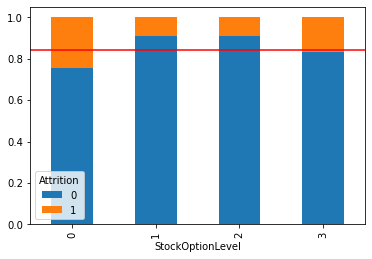

In [71]:
gender_cros.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color='r')
plt.show()

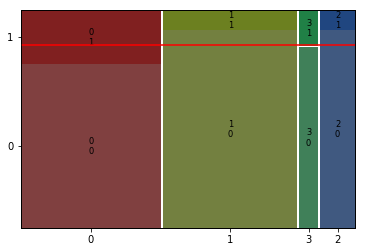

In [74]:
mosaic(data, [ 'StockOptionLevel','Attrition'])
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

#### 1) JobRole  --> Attrtion

① 교차표(pd.crosstab())

In [77]:
pd.crosstab(data['Attrition'], data['JobRole'])

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
0,102,35,172,83,114,66,207,233,38
1,8,8,55,4,9,0,39,50,27


② 시각화( Stacked Bar, Mosaic)

In [78]:
gender_cros = pd.crosstab(data['JobRole'], data['Attrition'], normalize='index')

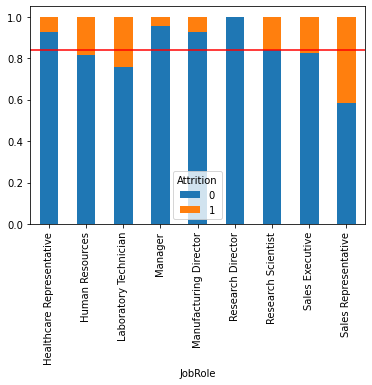

In [79]:
gender_cros.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color='r')
plt.show()

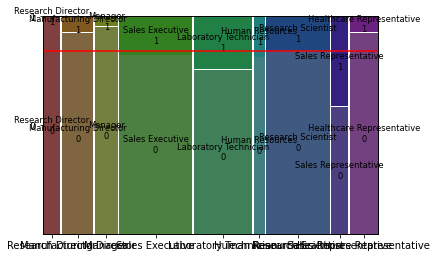

In [83]:
mosaic(data, [ 'JobRole','Attrition'])
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()